In [39]:
import sys
sys.path.append("../LearningModel/")
from utils import precision_recall_f1
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR

In [49]:
#validation on a completely different data set
train_data = pickle.load(open("/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Contract-Uncontract-5-Seconds-Trial-1.DatLabl"))
train_labels = train_data[1]
train_x = np.array([train_data[0]])

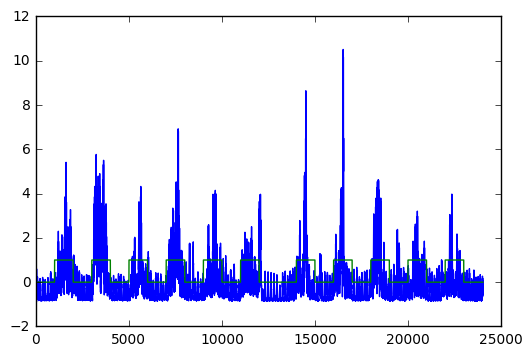

In [50]:
std = [np.std(train_x[0][i]) for i in range(len(train_x[0]))]
z = np.array((std - np.mean(std))/np.std(std))
plt.plot(z)
plt.plot(train_labels)
plt.show()

In [51]:
lr = LR()
lr.fit(z.reshape((-1, 1)), train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#validation on a completely different data set
test_data = pickle.load(open("/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.DatLabl"))
test_labels = test_data[1]
test_x = np.array([test_data[0]])
print np.array(test_labels).shape

(16511,)


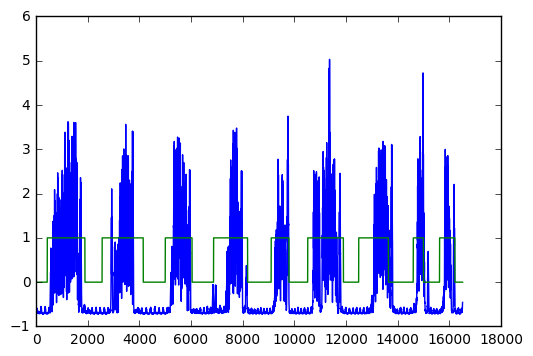

In [53]:
std = [np.std(test_x[0][i]) for i in range(len(test_x[0]))]
z = np.array((std - np.mean(std))/np.std(std))
plt.plot(z)
plt.plot(test_labels)
plt.show()

In [54]:
predictions = lr.predict(z.reshape((-1, 1)))

In [55]:
precision_recall_f1(predictions, test_labels, 50)

Precision: 0.980388723516
Recall: 0.689786867069
F1: 0.809806190338


(0.9803887235160217, 0.6897868670691142, 0.8098061903384437)

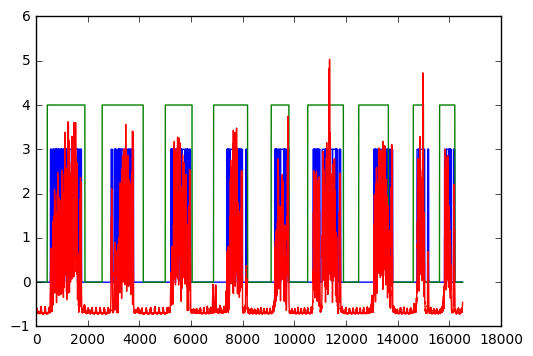

In [56]:
plt.plot(predictions * 3)
plt.plot([test_labels[i] * 4 for i in range(len(test_labels))])
plt.plot(z)
plt.show()